# Logistic Regression

## Financial Machine Learning 



In [ ]:
!pip install -q finance-datareader

In [ ]:
# 먼저 필요한 module을 불러오자
import FinanceDataReader as fdr 
import seaborn as sns
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# 주가 데이터를 불러오자  
# (yahoo finance open API, 공식적으로 없어졌지만, 비공식적으로 서비스는 제공되고 있음)

start = datetime(2010,1,1)
end = datetime.today()

# 국내주식
kospi = pdr.DataReader('^KS11','yahoo',start,end) #KOSPI
# 국내 채권 수익률
kbr = fdr.DataReader('KR3YT=RR',start,end) # 3년만기 한국국채 수익률

# 해외주식
snp = pdr.DataReader('^GSPC','yahoo',start,end) #S&P500
apl = pdr.DataReader('aapl','yahoo',start,end) # Aple
gme = pdr.DataReader('gme','yahoo',start,end) # GameStop Corp. (GME)
amz = pdr.DataReader('amzn','yahoo',start,end) # Amazon.com, Inc. (AMZN)
fb = pdr.DataReader('fb','yahoo',start,end) # Facebook
tsl = pdr.DataReader('tsla','yahoo',start,end) # Tesla, Inc. (TSLA)
gg = pdr.DataReader('goog','yahoo',start,end) # Alphabet Inc. (GOOG)
vix = pdr.DataReader('^vix','yahoo',start,end) # CBOE Volatility Index (^VIX)

# 해외채권 : Treasury Yield 10 Years (^TNX) NYBOT - NYBOT Real Time Price. Currency in USD
tr1 = pdr.DataReader('^tnx','yahoo',start,end)
tr2 = fdr.DataReader('US10YT=X',start,end) # 10년 만기 미국국채 수익률
# 해외 대체 : S&P-GSCI Commodity Index Future (GD=F) CME - CME Delayed Price. Currency in USD
com = pdr.DataReader('gd=f','yahoo',start,end)
# 해외대체2
gold = fdr.DataReader('ZG',start,end) # 금 선물 (ICE)

# FX 환율 (1995 ~ 현재)
wd = fdr.DataReader('USD/KRW', start,end) # 달러 원화

# 국내 대체 : Bitcoin KRW price (Bithumbs), 2016 ~ Now
bcw = fdr.DataReader('BTC/KRW', start,end)
bcu = pdr.DataReader('BTC-USD','yahoo',start,end)


In [ ]:
stk = pd.DataFrame({
    'vix': vix['Adj Close'],
    'tr': tr1['Adj Close'],    
    'snp': snp['Adj Close'],
    'gme': gme['Close'],
    'amz': amz['Close'],
    'fb': fb['Adj Close'],
    'tsl': tsl['Adj Close'],
    'gg': gg['Adj Close'],
    'apl': apl['Adj Close']
}).dropna() 


In [ ]:
stk.head()

,vix,tr,snp,gme,amz,fb,tsl,gg,apl
Date,,,,,,,,,
2012-05-18,25.100000,1.702,1295.219971,19.070000,213.850006,38.230000,5.512,299.078979,16.316067
2012-05-21,22.010000,1.735,1315.989990,18.980000,218.110001,34.029999,5.754,305.908386,17.266645
2012-05-22,22.480000,1.793,1316.630005,19.040001,215.330002,31.000000,6.160,299.278229,17.134058
2012-05-23,22.330000,1.721,1318.859985,19.080000,217.279999,32.000000,6.204,303.592072,17.552126
2012-05-24,21.540001,1.759,1320.680054,19.170000,215.240005,33.029999,6.056,300.702881,17.390926


In [ ]:
# 연속시간 수익률 (로그 차분)
rt= (np.log(stk) - np.log(stk.shift(1)) )*100
#rst.columns=['apl','ggl','tsl' ,'nva'] 
rt.head()

,vix,tr,snp,gme,amz,fb,tsl,gg,apl
Date,,,,,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,-13.137096,1.920338,1.590868,-0.473063,1.972466,-11.637808,4.296775,2.257798,5.662632
2012-05-22,2.112910,3.288276,0.048622,0.315631,-1.282778,-9.325525,6.818146,-2.191199,-0.770845
2012-05-23,-0.669494,-4.098469,0.169227,0.209858,0.901510,3.174870,0.711749,1.431126,2.410690
2012-05-24,-3.601935,2.183994,0.137908,0.470590,-0.943313,3.168030,-2.414469,-0.956226,-0.922648


### Basic Statistics: Data before processing

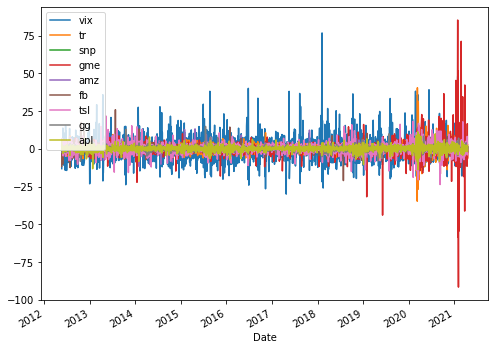

In [ ]:
rt.plot(figsize=(8,6))
plt.legend(loc=2);

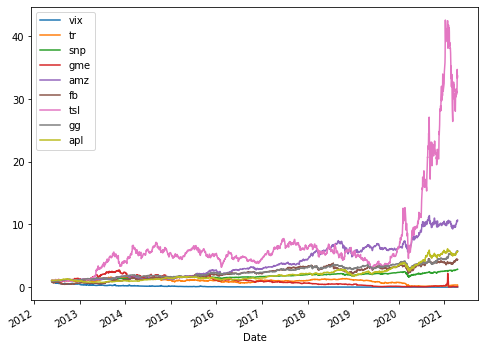

In [ ]:
# Cummulative return

cr_rt =(1+rt/100).cumprod()
cr_rt.plot(figsize=(8,6))
plt.legend(loc=2);

In [ ]:
df=rt
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

               vix           tr  ...           gg          apl
count  2220.000000  2220.000000  ...  2220.000000  2220.000000
mean     -0.019584    -0.003550  ...     0.091846     0.094905
std       8.023993     3.133060  ...     1.610096     1.818648
min     -29.983121   -34.700907  ...   -11.766726   -13.770815
25%      -4.487675    -1.283066  ...    -0.619991    -0.715795
50%      -0.639837    -0.084256  ...     0.069642     0.088655
75%       3.518632     1.269877  ...     0.881078     1.027943
max      76.824503    40.479689  ...    14.887189    11.315747
var      64.384468     9.816063  ...     2.592408     3.307480
skew      1.267607     0.351848  ...     0.371668    -0.427632
kurt      7.242662    32.818764  ...    10.043591     6.898585

[11 rows x 9 columns]


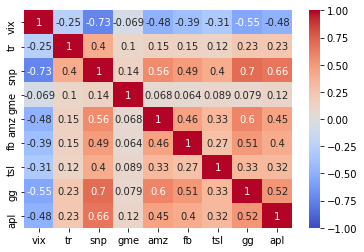

In [ ]:
sns.heatmap(rt.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

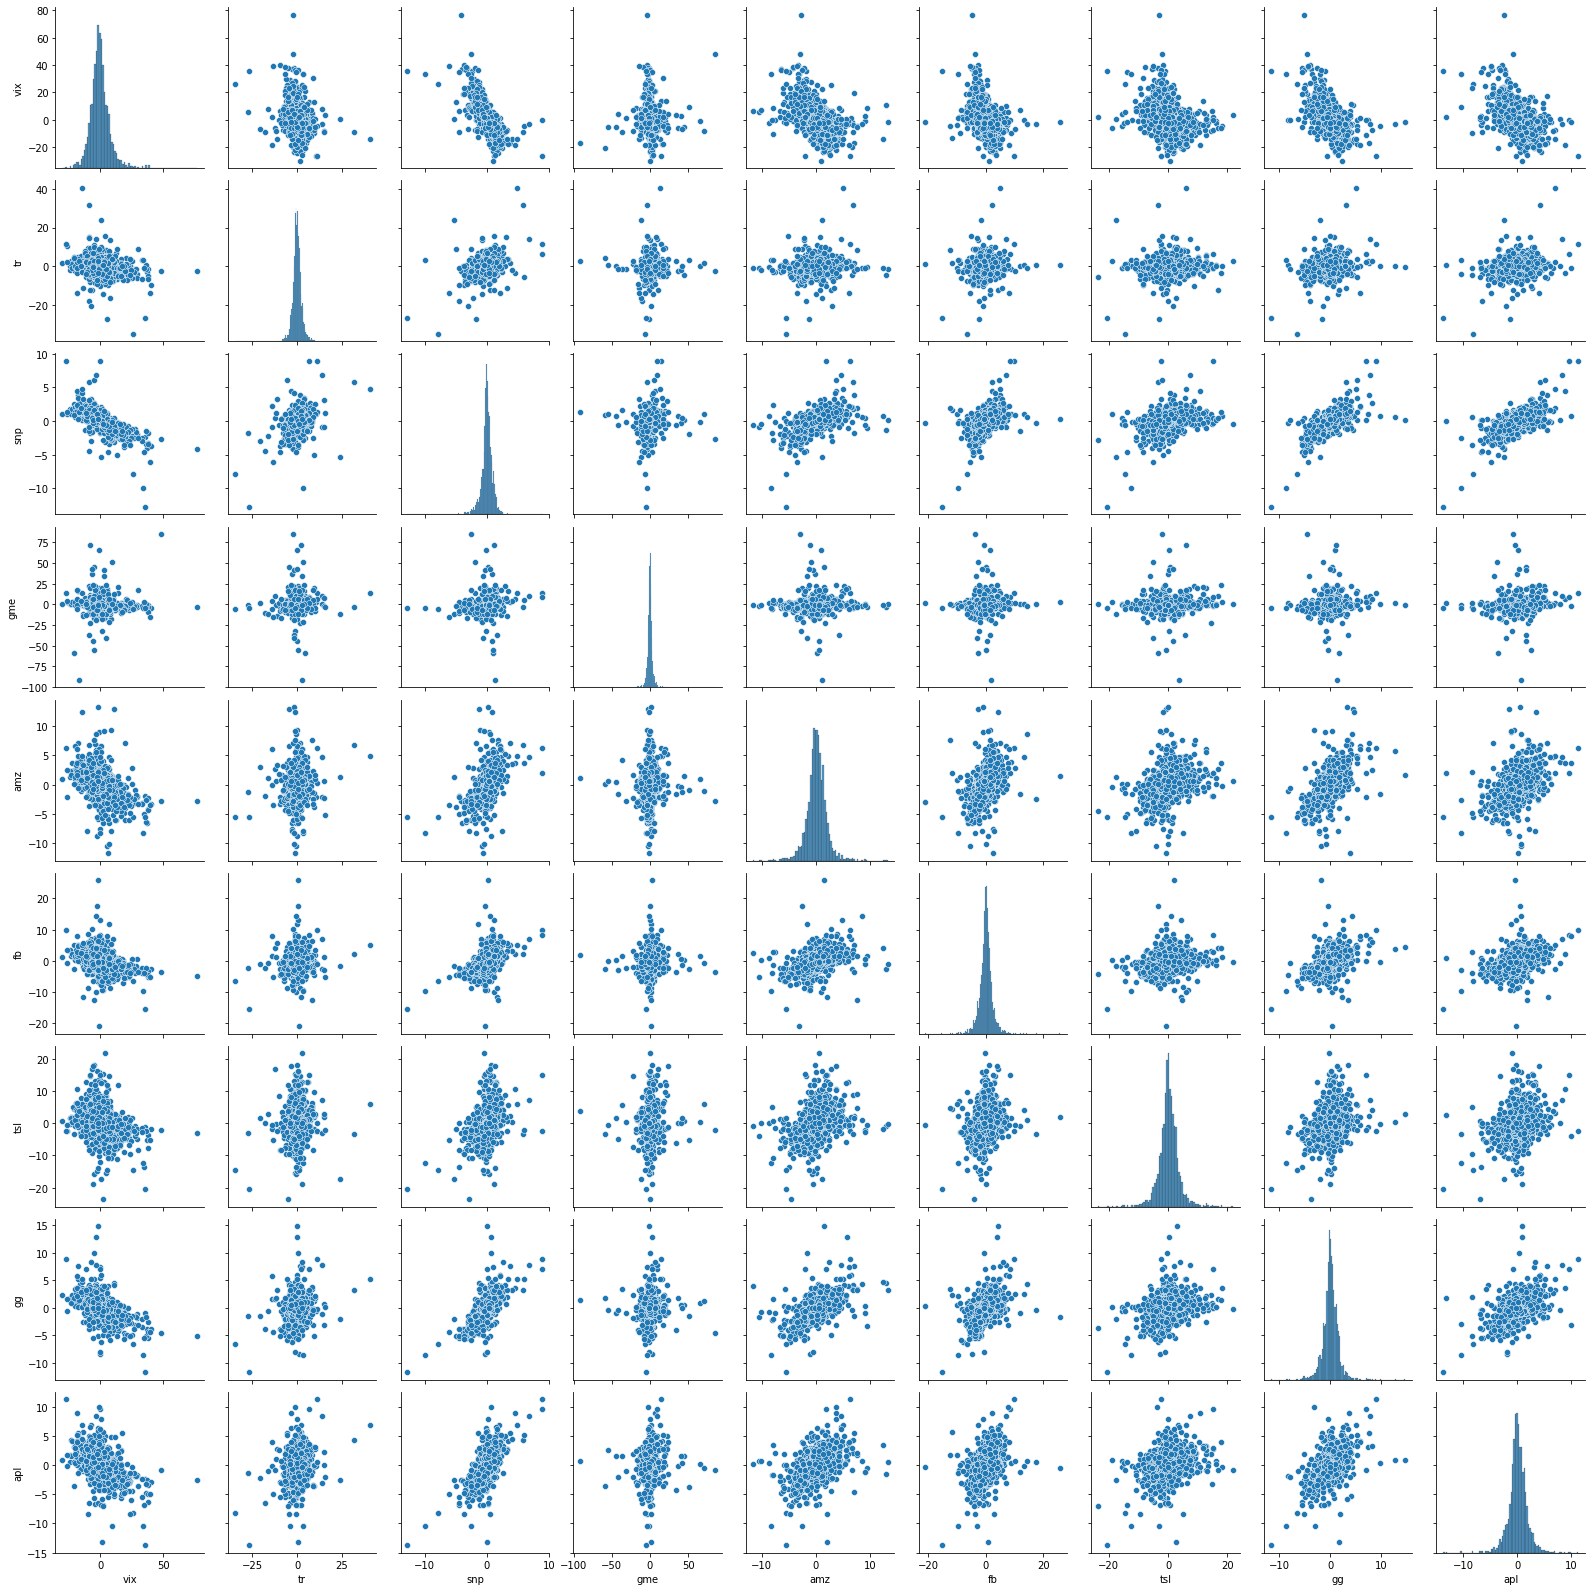

In [ ]:
sns.pairplot(rt)

In [ ]:
rt1 = rt.dropna()
rt1.head()

,vix,tr,snp,gme,amz,fb,tsl,gg,apl
Date,,,,,,,,,
2012-05-21,-13.137096,1.920338,1.590868,-0.473063,1.972466,-11.637808,4.296775,2.257798,5.662632
2012-05-22,2.112910,3.288276,0.048622,0.315631,-1.282778,-9.325525,6.818146,-2.191199,-0.770845
2012-05-23,-0.669494,-4.098469,0.169227,0.209858,0.901510,3.174870,0.711749,1.431126,2.410690
2012-05-24,-3.601935,2.183994,0.137908,0.470590,-0.943313,3.168030,-2.414469,-0.956226,-0.922648
2012-05-25,1.016172,-0.799088,-0.216798,1.809304,-1.097811,-3.449677,-1.564358,-2.029864,-0.537423


### Select Features and a Target

In [ ]:
# Feature 선정
x = rt1[['vix', 'tr', 'snp']]
x

,vix,tr,snp
Date,,,
2012-05-21,-13.137096,1.920338,1.590868
2012-05-22,2.112910,3.288276,0.048622
2012-05-23,-0.669494,-4.098469,0.169227
2012-05-24,-3.601935,2.183994,0.137908
2012-05-25,1.016172,-0.799088,-0.216798
...,...,...,...
2021-04-12,1.309538,0.538759,-0.019610
2021-04-13,-1.549496,-3.153683,0.328907
2021-04-14,2.021473,0.919969,-0.409610


In [ ]:
# Feature를 lag시켜야 외생변수처리 가능. 그렇지 않으면 내생성문제
# floating number features

X0=x.shift(1).dropna()
X0

,vix,tr,snp
Date,,,
2012-05-22,-13.137096,1.920338,1.590868
2012-05-23,2.112910,3.288276,0.048622
2012-05-24,-0.669494,-4.098469,0.169227
2012-05-25,-3.601935,2.183994,0.137908
2012-05-29,1.016172,-0.799088,-0.216798
...,...,...,...
2021-04-12,-1.545811,2.061931,0.769029
2021-04-13,1.309538,0.538759,-0.019610
2021-04-14,-1.549496,-3.153683,0.328907


In [ ]:
# Boolean features

X1 = np.where(X>=0,1,0)
X1

array([[0, 1, 1],
       [1, 1, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 1, 0],
       [0, 0, 1]])

In [ ]:
X1.shape

NameError: ignored

In [ ]:
# Select a target variable 
y = rt1[['apl']]
y=y.iloc[1:] # feature와 target의 시간 index를 맞추기 위해서 target 첫 행 삭제 
y

,apl
Date,
2012-05-22,-0.770845
2012-05-23,2.410690
2012-05-24,-0.922648
2012-05-25,-0.537423
2012-05-29,1.759296
...,...
2021-04-12,-1.332138
2021-04-13,2.401581
2021-04-14,-1.801440


In [ ]:
# Logistic Regression 을 위해서 generate a binary data
Y = np.where(y>=0,1,0)
Y

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
Y.shape

(2219, 1)

### Basic Statistics : Selected dataset

### Dataset 0 
- Floating number Features

In [ ]:
ds0 = np.concatenate((Y, X0), axis=1)
column_names = ['apl','vix', 'tr', 'snp']
ds0 = pd.DataFrame(ds0, columns=column_names)
ds0

,apl,vix,tr,snp
0,0.0,-13.137096,1.920338,1.590868
1,1.0,2.112910,3.288276,0.048622
2,0.0,-0.669494,-4.098469,0.169227
3,0.0,-3.601935,2.183994,0.137908
4,1.0,1.016172,-0.799088,-0.216798
...,...,...,...,...
2214,0.0,-1.545811,2.061931,0.769029
2215,1.0,1.309538,0.538759,-0.019610
2216,0.0,-1.549496,-3.153683,0.328907
2217,1.0,2.021473,0.919969,-0.409610


### Dataset 1
- Boolean features

In [ ]:
ds1 = np.concatenate((Y, X1), axis=1)
column_names = ['apl','vix', 'tr', 'snp']
ds1 = pd.DataFrame(ds1, columns=column_names)
ds1

,apl,vix,tr,snp
0,0,0,1,1
1,1,1,1,1
2,0,0,0,1
3,0,0,1,1
4,1,1,0,0
...,...,...,...,...
2214,0,0,1,1
2215,1,1,1,0
2216,0,0,0,1
2217,1,1,1,0


In [ ]:
df=ds0
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

               apl          vix           tr          snp
count  2219.000000  2219.000000  2219.000000  2219.000000
mean      0.527265    -0.018714    -0.004801     0.052697
std       0.499369     8.025697     3.133212     1.062762
min       0.000000   -29.983121   -34.700907   -12.765220
25%       0.000000    -4.487966    -1.283355    -0.314060
50%       1.000000    -0.637960    -0.087074     0.068745
75%       1.000000     3.519099     1.267169     0.522490
max       1.000000    76.824503    40.479689     8.968323
var       0.249369    64.411815     9.817015     1.129463
skew     -0.109295     1.267052     0.352841    -1.066876
kurt     -1.989849     7.238038    32.828294    22.064210


In [ ]:
df=ds1
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

               apl          vix           tr          snp
count  2219.000000  2219.000000  2219.000000  2219.000000
mean      0.527265     0.460568     0.493015     0.552952
std       0.499369     0.498555     0.500064     0.497300
min       0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000
50%       1.000000     0.000000     0.000000     1.000000
75%       1.000000     1.000000     1.000000     1.000000
max       1.000000     1.000000     1.000000     1.000000
var       0.249369     0.248557     0.250064     0.247308
skew     -0.109295     0.158329     0.027962    -0.213149
kurt     -1.989849    -1.976715    -2.001022    -1.956332


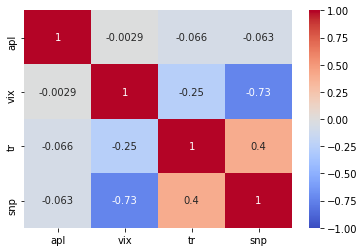

In [ ]:
sns.heatmap(ds0.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

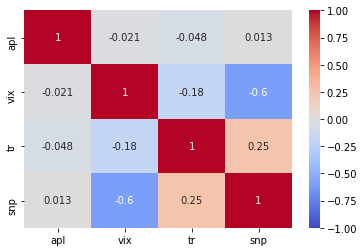

In [ ]:
sns.heatmap(ds1.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

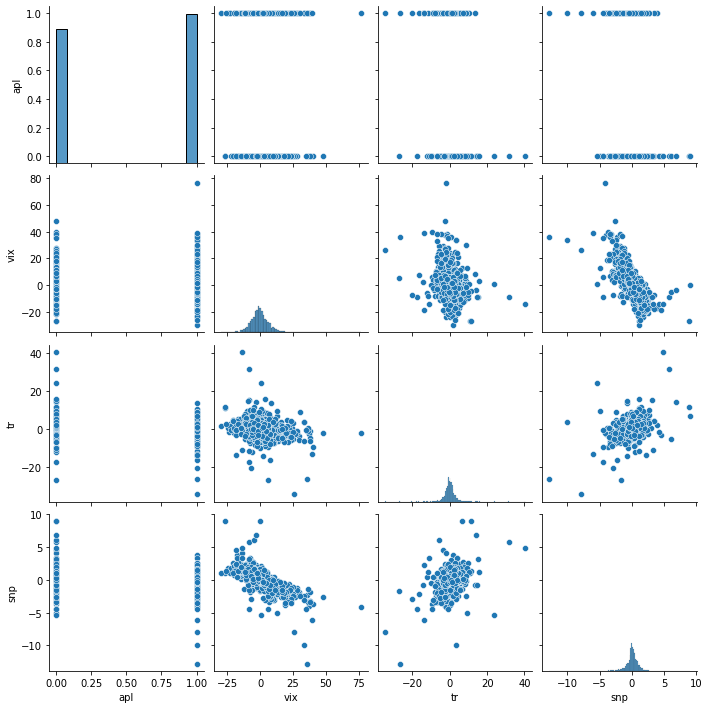

In [ ]:
sns.pairplot(ds0)

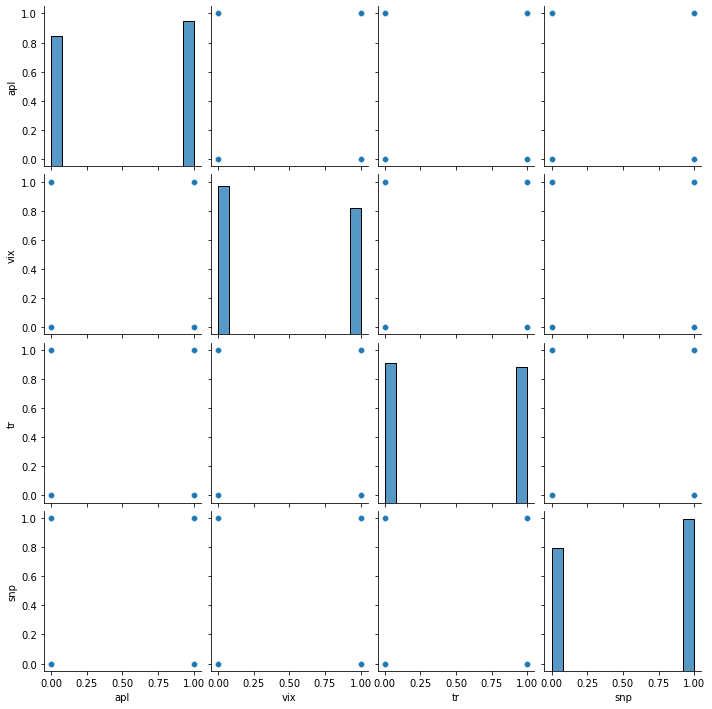

In [ ]:
sns.pairplot(ds1)

# Dataset 0: Floating Features

In [ ]:
X=X0
X

,vix,tr,snp
Date,,,
2012-05-22,-13.137096,1.920338,1.590868
2012-05-23,2.112910,3.288276,0.048622
2012-05-24,-0.669494,-4.098469,0.169227
2012-05-25,-3.601935,2.183994,0.137908
2012-05-29,1.016172,-0.799088,-0.216798
...,...,...,...
2021-04-12,-1.545811,2.061931,0.769029
2021-04-13,1.309538,0.538759,-0.019610
2021-04-14,-1.549496,-3.153683,0.328907


In [ ]:
ds0

,apl,vix,tr,snp
0,0.0,-13.137096,1.920338,1.590868
1,1.0,2.112910,3.288276,0.048622
2,0.0,-0.669494,-4.098469,0.169227
3,0.0,-3.601935,2.183994,0.137908
4,1.0,1.016172,-0.799088,-0.216798
...,...,...,...,...
2214,0.0,-1.545811,2.061931,0.769029
2215,1.0,1.309538,0.538759,-0.019610
2216,0.0,-1.549496,-3.153683,0.328907
2217,1.0,2.021473,0.919969,-0.409610


In [ ]:
# Splitting the dataset into the Training set and Test set

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, shuffle=False, random_state = 0)

In [ ]:
X_Train

,vix,tr,snp
Date,,,
2012-05-22,-13.137096,1.920338,1.590868
2012-05-23,2.112910,3.288276,0.048622
2012-05-24,-0.669494,-4.098469,0.169227
2012-05-25,-3.601935,2.183994,0.137908
2012-05-29,1.016172,-0.799088,-0.216798
...,...,...,...
2018-08-07,-3.230310,-0.509256,0.353198
2018-08-08,-3.063304,1.184250,0.282020
2018-08-09,-0.734621,-0.067298,-0.026241


In [ ]:
# Feature Scaling

#from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [ ]:
X_Train

array([[-1.67414257,  0.9156567 ,  1.96067541],
       [ 0.27543144,  1.57944681, -0.00226664],
       [-0.08027353, -2.00496048,  0.15123732],
       ...,
       [-0.08859945, -0.04884057, -0.09755125],
       [ 0.49084529, -0.607758  , -0.24777762],
       [ 1.98732873, -1.32321437, -0.97282972]])

In [ ]:
X_Test

array([[ 1.48945804,  0.32232278, -0.57505072],
       [-1.33393599,  0.28646451,  0.74647364],
       [ 1.22289556, -0.74233947, -1.03543734],
       ...,
       [-0.19277373, -1.54650444,  0.35447516],
       [ 0.26374206,  0.43022912, -0.585496  ],
       [-0.31468469, -3.32598075,  1.34012049]])

In [ ]:
# Fitting the Logistic Regression into the Training set

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, Y_Train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_Train.shape

(1553, 3)

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
model.fit(X_Train, Y_Train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
 #model = LogisticRegression(solver='liblinear', random_state=0).fit(X_Train, Y_Train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model.classes_

array([0, 1])

In [ ]:
model.intercept_

array([0.07099596])

In [ ]:
model.coef_ 

array([[-0.21767415, -0.0597522 , -0.18643231]])

In [ ]:
model.predict_proba(X_Train)

array([[0.49620813, 0.50379187],
       [0.52071593, 0.47928407],
       [0.45510258, 0.54489742],
       ...,
       [0.47218205, 0.52781795],
       [0.48833705, 0.51166295],
       [0.52526902, 0.47473098]])

In [ ]:
model.predict(X_Train)

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
model.score(X_Train, Y_Train)

0.5383129426915647

In [ ]:
confusion_matrix(Y_Train, model.predict(X_Train))

array([[228, 521],
       [196, 608]])

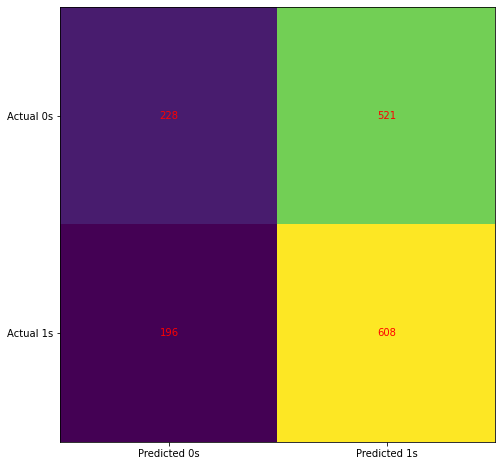

In [ ]:
cm = confusion_matrix(Y_Train, model.predict(X_Train))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [ ]:
print(classification_report(Y_Train, model.predict(X_Train)))

              precision    recall  f1-score   support

           0       0.54      0.30      0.39       749
           1       0.54      0.76      0.63       804

    accuracy                           0.54      1553
   macro avg       0.54      0.53      0.51      1553
weighted avg       0.54      0.54      0.51      1553



## Using Scikit-learn 

In [ ]:
# Step 1: Import packages, functions, and classe
# Step 2: Get data
#x=X_Train
#y=Y_Train

# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X_Train, Y_Train)

# Step 4: Evaluate the model
p_pred = model.predict_proba(X_Train)
Y_pred = model.predict(X_Train)
score_ = model.score(X_Train, Y_Train)
conf_m = confusion_matrix(Y_Train, Y_pred)
report = classification_report(Y_Train, Y_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_Train

array([[ 1.        , -1.67414257,  0.9156567 ,  1.96067541],
       [ 1.        ,  0.27543144,  1.57944681, -0.00226664],
       [ 1.        , -0.08027353, -2.00496048,  0.15123732],
       ...,
       [ 1.        , -0.08859945, -0.04884057, -0.09755125],
       [ 1.        ,  0.49084529, -0.607758  , -0.24777762],
       [ 1.        ,  1.98732873, -1.32321437, -0.97282972]])

In [ ]:
print('X:', X, sep='\n')

X:
                  vix        tr       snp
Date                                     
2012-05-22 -13.137096  1.920338  1.590868
2012-05-23   2.112910  3.288276  0.048622
2012-05-24  -0.669494 -4.098469  0.169227
2012-05-25  -3.601935  2.183994  0.137908
2012-05-29   1.016172 -0.799088 -0.216798
...               ...       ...       ...
2021-04-12  -1.545811  2.061931  0.769029
2021-04-13   1.309538  0.538759 -0.019610
2021-04-14  -1.549496 -3.153683  0.328907
2021-04-15   2.021473  0.919969 -0.409610
2021-04-16  -2.503111 -6.820828  1.103310

[2219 rows x 3 columns]


In [ ]:
print('Y:', Y, sep='\n', end='\n\n')

Y:
[[0]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]



In [ ]:
X.shape

(2219, 3)

In [ ]:
X_Train.shape

(1553, 4)

In [ ]:
print('intercept:', model.intercept_)

intercept: [0.03558846]


In [ ]:
print('coef:', model.coef_, end='\n\n')

coef: [[ 0.03558846 -0.22031402 -0.05971429 -0.18903216]]



In [ ]:
print('p_pred:', p_pred, sep='\n', end='\n\n')

p_pred:
[[0.49632369 0.50367631]
 [0.52083582 0.47916418]
 [0.45512151 0.54487849]
 ...
 [0.47201592 0.52798408]
 [0.4884604  0.5115396 ]
 [0.5259139  0.4740861 ]]



In [ ]:
print('Y_pred:', Y_pred, end='\n\n')

Y_pred: [1 0 1 ... 1 1 0]



In [ ]:
print('score_:', score_, end='\n\n')

score_: 0.5389568576947843



In [ ]:
print('conf_m:', conf_m, sep='\n', end='\n\n')

conf_m:
[[230 519]
 [197 607]]



In [ ]:
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.54      0.31      0.39       749
           1       0.54      0.75      0.63       804

    accuracy                           0.54      1553
   macro avg       0.54      0.53      0.51      1553
weighted avg       0.54      0.54      0.51      1553



## Using StatsModels 

In [ ]:
# Data 
# Add constant to Features
X_Train = sm.add_constant(X_Train)
X_Train


array([[ 1.        , -1.67414257,  0.9156567 ,  1.96067541],
       [ 1.        ,  0.27543144,  1.57944681, -0.00226664],
       [ 1.        , -0.08027353, -2.00496048,  0.15123732],
       ...,
       [ 1.        , -0.08859945, -0.04884057, -0.09755125],
       [ 1.        ,  0.49084529, -0.607758  , -0.24777762],
       [ 1.        ,  1.98732873, -1.32321437, -0.97282972]])

In [ ]:
model = sm.Logit(Y_Train, X_Train)

In [ ]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.689989
         Iterations 4


In [ ]:
result.params

array([ 0.07118704, -0.22062186, -0.05970507, -0.18933815])

In [ ]:
# Step 4: Evaluate the Model

In [ ]:
result.predict(X_Train)


array([0.5036598 , 0.47914936, 0.54487106, ..., 0.52800073, 0.51152192,
       0.47400727])

In [ ]:
(result.predict(X_Train) >= 0.5).astype(int)

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
result.pred_table()

array([[230., 519.],
       [197., 607.]])

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1553
Model:                          Logit   Df Residuals:                     1549
Method:                           MLE   Df Model:                            3
Date:                Sun, 18 Apr 2021   Pseudo R-squ.:                0.003655
Time:                        06:56:38   Log-Likelihood:                -1071.6
converged:                       True   LL-Null:                       -1075.5
Covariance Type:            nonrobust   LLR p-value:                   0.04895
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0712      0.051      1.398      0.162      -0.029       0.171
x1            -0.2206      0.089     -2.471      0.013      -0.396      -0.046
x2            -0.0597      0.055     -1.089      0.276      -0.167       0.048
x3            -0.1893      0.091     -2.073      0.038      -0.368      -0.010
==============================================================================
"""

In [ ]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.004    
Dependent Variable: y                AIC:              2151.1048
Date:               2021-04-18 06:56 BIC:              2172.4966
No. Observations:   1553             Log-Likelihood:   -1071.6  
Df Model:           3                LL-Null:          -1075.5  
Df Residuals:       1549             LLR p-value:      0.048951 
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
const     0.0712     0.0509    1.3982   0.1620   -0.0286    0.1710
x1       -0.2206     0.0893   -2.4706   0.0135   -0.3956   -0.0456
x2       -0.0597     0.0548   -1.0888   0.2762   -0.1672    0.0478
x3       -0.1893     0.0913   -2.0731   0.0382   -0.3683   -0.0103
================================================================

"""

## Logistic Regression: Train and Test

In [ ]:
model = LogisticRegression(solver='liblinear', fit_intercept=True, C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(X_Train, Y_Train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
 model.score(X_Train, Y_Train)

0.5370251126851255

### Test set

In [ ]:
X_Test

array([[ 1.48945804,  0.32232278, -0.57505072],
       [-1.33393599,  0.28646451,  0.74647364],
       [ 1.22289556, -0.74233947, -1.03543734],
       ...,
       [-0.19277373, -1.54650444,  0.35447516],
       [ 0.26374206,  0.43022912, -0.585496  ],
       [-0.31468469, -3.32598075,  1.34012049]])

In [ ]:
X_Test = sm.add_constant(X_Test)
X_Test

array([[ 1.        ,  1.48945804,  0.32232278, -0.57505072],
       [ 1.        , -1.33393599,  0.28646451,  0.74647364],
       [ 1.        ,  1.22289556, -0.74233947, -1.03543734],
       ...,
       [ 1.        , -0.19277373, -1.54650444,  0.35447516],
       [ 1.        ,  0.26374206,  0.43022912, -0.585496  ],
       [ 1.        , -0.31468469, -3.32598075,  1.34012049]])

In [ ]:
Y_pred = model.predict(X_Test)

In [ ]:
model.score(X_Test, Y_Test)

0.56006006006006

In [ ]:
confusion_matrix(Y_Test, Y_pred)

array([[105, 195],
       [ 98, 268]])

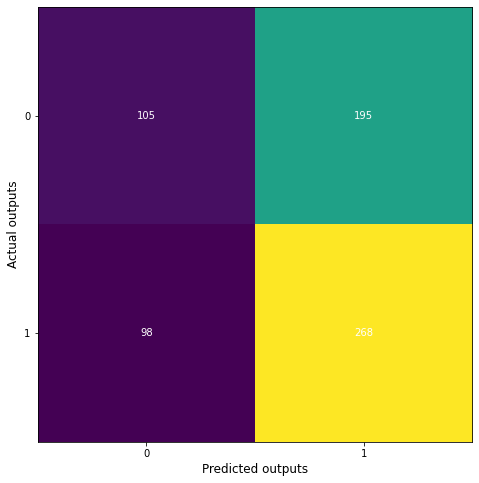

In [ ]:
cm = confusion_matrix(Y_Test, Y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
font_size=12
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=font_size, color='black')
ax.set_ylabel('Actual outputs', fontsize=font_size, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()


In [ ]:
print(classification_report(Y_Test, Y_pred))

              precision    recall  f1-score   support

           0       0.52      0.35      0.42       300
           1       0.58      0.73      0.65       366

    accuracy                           0.56       666
   macro avg       0.55      0.54      0.53       666
weighted avg       0.55      0.56      0.54       666



# Dataset 1: Boolean Features

In [ ]:
X=X1
X

array([[0, 1, 1],
       [1, 1, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 1, 0],
       [0, 0, 1]])

In [ ]:

# Splitting the dataset into the Training set and Test set
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, shuffle=False, random_state = 0)
# Feature Scaling
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [ ]:
# Fitting the Logistic Regression into the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, Y_Train)

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_Train, Y_Train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.classes_

array([0, 1])

In [ ]:
model.intercept_

array([0.07114555])

In [ ]:
model.coef_ 

array([[-0.08515052, -0.1474248 ,  0.036771  ]])

In [ ]:
model.predict_proba(X_Train)

array([[0.49134418, 0.50865582],
       [0.53396759, 0.46603241],
       [0.41836148, 0.58163852],
       ...,
       [0.43643835, 0.56356165],
       [0.47878202, 0.52121798],
       [0.47878202, 0.52121798]])

In [ ]:
model.predict(X_Train)

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
model.score(X_Train, Y_Train)

0.5441081777205409

In [ ]:
confusion_matrix(Y_Train, model.predict(X_Train))

array([[194, 555],
       [153, 651]])

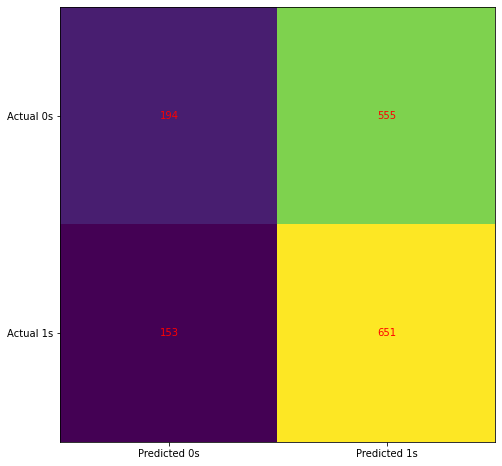

In [ ]:
cm = confusion_matrix(Y_Train, model.predict(X_Train))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(classification_report(Y_Train, model.predict(X_Train)))

              precision    recall  f1-score   support

           0       0.56      0.26      0.35       749
           1       0.54      0.81      0.65       804

    accuracy                           0.54      1553
   macro avg       0.55      0.53      0.50      1553
weighted avg       0.55      0.54      0.51      1553



## Using Scikit-learn 

In [ ]:
# Step 1: Import packages, functions, and classe
# Step 2: Get data
#x=X_Train
#y=Y_Train

# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X_Train, Y_Train)

# Step 4: Evaluate the model
p_pred = model.predict_proba(X_Train)
Y_pred = model.predict(X_Train)
score_ = model.score(X_Train, Y_Train)
conf_m = confusion_matrix(Y_Train, Y_pred)
report = classification_report(Y_Train, Y_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('intercept:', model.intercept_)

intercept: [0.07131427]


In [ ]:
print('coef:', model.coef_, end='\n\n')

coef: [[-0.08539556 -0.14783235  0.03682661]]



In [ ]:
print('score_:', score_, end='\n\n')

score_: 0.5441081777205409



In [ ]:
print('conf_m:', conf_m, sep='\n', end='\n\n')

conf_m:
[[194 555]
 [153 651]]



In [ ]:
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.56      0.26      0.35       749
           1       0.54      0.81      0.65       804

    accuracy                           0.54      1553
   macro avg       0.55      0.53      0.50      1553
weighted avg       0.55      0.54      0.51      1553



## Using StatsModels 

In [ ]:
# Data 
# Add constant to Features
X_Train = sm.add_constant(X_Train)
X_Train

array([[ 1.        , -0.93331899,  1.01361489,  0.90942775],
       [ 1.        ,  1.07144504,  1.01361489,  0.90942775],
       [ 1.        , -0.93331899, -0.98656799,  0.90942775],
       ...,
       [ 1.        , -0.93331899, -0.98656799, -1.09959258],
       [ 1.        ,  1.07144504, -0.98656799, -1.09959258],
       [ 1.        ,  1.07144504, -0.98656799, -1.09959258]])

In [ ]:
model = sm.Logit(Y_Train, X_Train)

In [ ]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.689228
         Iterations 4


In [ ]:
result.params

array([ 0.07133267, -0.08542277, -0.14787708,  0.03683243])

In [ ]:
result.predict(X_Train)
(result.predict(X_Train) >= 0.5).astype(int)

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
result.pred_table()

array([[194., 555.],
       [153., 651.]])

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1553
Model:                          Logit   Df Residuals:                     1549
Method:                           MLE   Df Model:                            3
Date:                Sun, 18 Apr 2021   Pseudo R-squ.:                0.004754
Time:                        08:02:49   Log-Likelihood:                -1070.4
converged:                       True   LL-Null:                       -1075.5
Covariance Type:            nonrobust   LLR p-value:                   0.01674
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0713      0.051      1.400      0.162      -0.029       0.171
x1            -0.0854      0.063     -1.359      0.174      -0.209       0.038
x2            -0.1479      0.053     -2.787      0.005      -0.252      -0.044
x3             0.0368      0.064      0.574      0.566      -0.089       0.163
==============================================================================
"""

In [ ]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.005    
Dependent Variable: y                AIC:              2148.7415
Date:               2021-04-18 08:02 BIC:              2170.1333
No. Observations:   1553             Log-Likelihood:   -1070.4  
Df Model:           3                LL-Null:          -1075.5  
Df Residuals:       1549             LLR p-value:      0.016744 
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
const     0.0713     0.0510    1.4000   0.1615   -0.0285    0.1712
x1       -0.0854     0.0629   -1.3586   0.1743   -0.2087    0.0378
x2       -0.1479     0.0531   -2.7868   0.0053   -0.2519   -0.0439
x3        0.0368     0.0642    0.5735   0.5663   -0.0890    0.1627
================================================================

"""

### Logistic Regression: Train and Test

In [ ]:
model = LogisticRegression(solver='liblinear', fit_intercept=True, C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(X_Train, Y_Train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
 model.score(X_Train, Y_Train)

0.5441081777205409

- Test set

In [ ]:
X_Test = sm.add_constant(X_Test)
X_Test

array([[ 1.        ,  1.07144504,  1.01361489, -1.09959258],
       [ 1.        , -0.93331899,  1.01361489,  0.90942775],
       [ 1.        ,  1.07144504, -0.98656799, -1.09959258],
       ...,
       [ 1.        , -0.93331899, -0.98656799,  0.90942775],
       [ 1.        ,  1.07144504,  1.01361489, -1.09959258],
       [ 1.        , -0.93331899, -0.98656799,  0.90942775]])

In [ ]:
Y_pred = model.predict(X_Test)

In [ ]:
model.score(X_Test, Y_Test)

0.5330330330330331

In [ ]:
confusion_matrix(Y_Test, Y_pred)

array([[ 69, 231],
       [ 80, 286]])

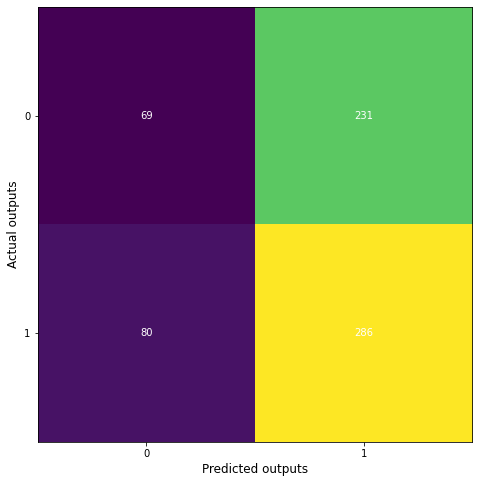

In [ ]:
cm = confusion_matrix(Y_Test, Y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
font_size=12
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=font_size, color='black')
ax.set_ylabel('Actual outputs', fontsize=font_size, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
print(classification_report(Y_Test, model.predict(X_Test)))

              precision    recall  f1-score   support

           0       0.46      0.23      0.31       300
           1       0.55      0.78      0.65       366

    accuracy                           0.53       666
   macro avg       0.51      0.51      0.48       666
weighted avg       0.51      0.53      0.49       666

